# Feature Selection Techniques [categorical result] - Step Forward Selection

Forward selection is an iterative method in which we start with no function in the model. In each iteration, we add a function that best improves our model until adding a new variable improves the model's performance.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [13]:
##  colorful prints
def black(text):
     print('\033[30m', text, '\033[0m', sep='')  
def red(text):
     print('\033[31m', text, '\033[0m', sep='')  
def green(text):
     print('\033[32m', text, '\033[0m', sep='')  
def yellow(text):
     print('\033[33m', text, '\033[0m', sep='')  
def blue(text):
     print('\033[34m', text, '\033[0m', sep='') 
def magenta(text):
     print('\033[35m', text, '\033[0m', sep='')  
def cyan(text):
     print('\033[36m', text, '\033[0m', sep='')  
def gray(text):
     print('\033[90m', text, '\033[0m', sep='')

data source: https://archive.ics.uci.edu/ml/datasets/QSAR+oral+toxicity

In [14]:
df = pd.read_csv ('/home/wojciech/Pulpit/6/qsar_oral_toxicity.csv', sep=';')
green(df.shape)
df.head(3)


(8991, 1025)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.962,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.970,negative
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative


### Szukam pustych komórek

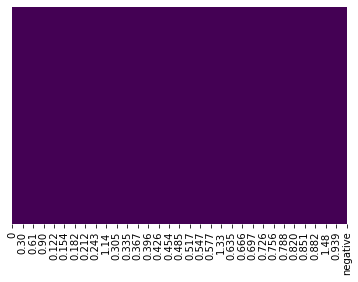

In [15]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
null_value = df.isnull().sum(axis=0)
null_value[null_value != 0]

Series([], dtype: int64)

### Mark empty cells as -999

In [50]:
df.fillna(-999, inplace=True)

In [18]:
df.shape

(8991, 1025)

### Deletes duplicates
there were no duplicates

In [19]:
green(df.shape)
df.drop_duplicates(keep='first', inplace=True)
blue(df.shape)

(8991, 1025)
(8514, 1025)


In [20]:
blue(df.dtypes)

0            int64
0.1          int64
0.2          int64
0.3          int64
0.4          int64
             ...  
0.967        int64
0.968        int64
0.969        int64
0.970        int64
negative    object
Length: 1025, dtype: object


In [21]:
df.columns

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.962', '0.963', '0.964', '0.965', '0.966', '0.967', '0.968', '0.969',
       '0.970', 'negative'],
      dtype='object', length=1025)

### Encodes the resulting value

In [25]:
df['negative'] = pd.Categorical(df['negative']).codes
df['negative'].value_counts()

0    7795
1     719
Name: negative, dtype: int64

In [27]:
df.rename(columns={'negative':'ident'}, inplace=True)
df['ident'].head(2)

0    0
1    0
Name: ident, dtype: int8

# Step Forward Selection

In [28]:
X = df.drop('ident', axis=1) 
y = df['ident']  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
# Jeżeli się rzuca wtedy wycinamy stratify=y.


## <div class="alert-danger"> I specify how many programs should indicate the best variables:</div>

In [29]:
k_features = 15

In [30]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

LR = LogisticRegression()

sfs1 = sfs(LR,k_features = k_features, forward=True, floating=False, scoring='r2',verbose=2,cv=5)
sfs1 = sfs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:   39.9s finished

[2020-04-01 09:39:39] Features: 1/15 -- score: -0.09360936522977936[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1023 out of 1023 | elapsed:   43.9s finished

[2020-04-01 09:40:23] Features: 2/15 -- score: -0.09360936522977936[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1022 out of 1022 | elapsed:   46.6s finished

[2020-04-01 09:41:09] Features: 3/15 -- score: -0.09360936522977936[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

In [32]:
feat_cols =list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 67, 93, 231, 426, 506, 512, 526, 558, 559, 696, 795, 939]


In [33]:
PPS = feat_cols

KOT_lasso = dict(zip(df, PPS))
KOT_sorted_keys_lasso = sorted(KOT_lasso, key=KOT_lasso.get, reverse=True)

for r in KOT_sorted_keys_lasso:
    print (r, (KOT_lasso[r]))

0.13 939
0.12 795
0.11 696
0.10 559
1 558
0.9 526
0.8 512
0.7 506
0.6 426
0.5 231
0.4 93
0.3 67
0.2 2
0.1 1
0 0


In [37]:
new_cols = df.columns[feat_cols]
new_cols

Index(['0', '0.1', '0.2', '0.64', '0.87', '0.218', '0.406', '0.479', '0.485',
       '0.499', '0.530', '0.531', '0.658', '0.751', '0.891'],
      dtype='object')

#### Tworzę zbiór danych ze zredukowanymi kolumnami

In [39]:
df2 = df[new_cols]
df2['ident']=df['ident']
df2.head(3)

,0,0.1,0.2,0.64,0.87,0.218,0.406,0.479,0.485,0.499,0.530,0.531,0.658,0.751,0.891,ident
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# Classification Assessment
def Classification_Assessment(model ,Xtrain, ytrain, Xtest, ytest, y_pred):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

    print("Recall Training data:     ", np.round(recall_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Precision Training data:  ", np.round(precision_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Recall Test data:         ", np.round(recall_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("Precision Test data:      ", np.round(precision_score(ytest, model.predict(Xtest)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Confusion Matrix Test data")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("----------------------------------------------------------------------")
    print(classification_report(ytest, model.predict(Xtest)))
    
    y_pred_proba = model.predict_proba(Xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred)
    auc = metrics.roc_auc_score(ytest, y_pred)
    plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
    plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
    plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.show()
    print('auc',auc)

### OLS linear regression model for variables before reduction

In [41]:
blue(df.shape)

(8514, 1025)


In [42]:
X1 = df.drop('ident', axis=1) 
y1 = df['ident']  


from sklearn.model_selection import train_test_split 

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=123,stratify=y1)

In [43]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X1_train,y1_train)
y1_pred = logmodel.predict(X1_test)

Recall Training data:      0.6887
Precision Training data:   0.9188
----------------------------------------------------------------------
Recall Test data:          0.3958
Precision Test data:       0.6196
----------------------------------------------------------------------
Confusion Matrix Test data
[[1524   35]
 [  87   57]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1559
           1       0.62      0.40      0.48       144

    accuracy                           0.93      1703
   macro avg       0.78      0.69      0.72      1703
weighted avg       0.92      0.93      0.92      1703



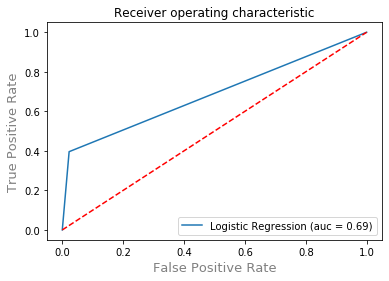

auc 0.6866915223433825


In [44]:
Classification_Assessment(logmodel ,X1_train, y1_train, X1_test, y1_test, y1_pred)

### OLS linear regression model for variables after reduction

In [45]:
blue(df2.shape)

(8514, 16)


In [47]:
X2 = df2.drop('ident', axis=1) 
y2 = df2['ident']  


from sklearn.model_selection import train_test_split 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=123,stratify=y2)

In [48]:
from sklearn.linear_model import LogisticRegression

logmodel2 = LogisticRegression()
logmodel2.fit(X2_train,y2_train)
y2_pred = logmodel2.predict(X2_test)

Recall Training data:      0.2104
Precision Training data:   0.7707
----------------------------------------------------------------------
Recall Test data:          0.1458
Precision Test data:       0.6562
----------------------------------------------------------------------
Confusion Matrix Test data
[[1548   11]
 [ 123   21]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1559
           1       0.66      0.15      0.24       144

    accuracy                           0.92      1703
   macro avg       0.79      0.57      0.60      1703
weighted avg       0.90      0.92      0.90      1703



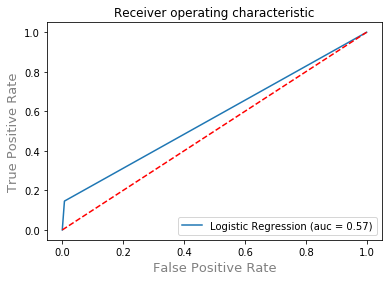

auc 0.569388764165063


In [49]:
Classification_Assessment(logmodel2 ,X2_train, y2_train, X2_test, y2_test, y2_pred)